In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kbnatparc-biomass-estimation/Biomass-Estimat-KBNP.csv


In [4]:
import numpy as np
import pandas as pd

# Replace this with your actual diameter data
diameters = [10, 20, 30, 40, 50]  # Example diameter values in cm
altitude = 2350  # Example altitude

# Parameters for the Upper Montane (2400–2600 m) Model 3
a = 13.33
b = 11.11
c = 1.35

# Function to estimate height from diameter using the selected model
def estimate_height(diameter, a, b, c):
    return a * (1 - np.exp(-b * diameter)) ** c

# Estimate heights for all diameters
heights = [estimate_height(d, a, b, c) for d in diameters]

# Create a DataFrame for easy analysis
data = pd.DataFrame({
    'Diameter': diameters,
    'Estimated_Height': heights,
    'Altitude': altitude
})

# Display the data
data.head()


,Diameter,Estimated_Height,Altitude
0,10,13.33,2350
1,20,13.33,2350
2,30,13.33,2350
3,40,13.33,2350
4,50,13.33,2350


In [7]:
import pandas as pd

file_path = '/kaggle/input/kbnatparc-biomass-estimation/Biomass-Estimat-KBNP.csv'

# Try specifying the delimiter (e.g., comma or semicolon) or handling bad lines
try:
    data = pd.read_csv(file_path, delimiter=',', error_bad_lines=False)
except Exception as e:
    print(f"Error: {e}")

# Check the first few rows of the dataset to confirm it loaded correctly
print(data.head())


Error: read_csv() got an unexpected keyword argument 'error_bad_lines'
   Diameter  Estimated_Height  Altitude
0        10             13.33      2350
1        20             13.33      2350
2        30             13.33      2350
3        40             13.33      2350
4        50             13.33      2350


In [8]:
# Read a subset of lines to find issues
data_subset = pd.read_csv(file_path, delimiter=',', nrows=100)  # Read only the first 100 rows
print(data_subset.head())


                                                                                     METHODES;Genre;EPITHETE;CIRCONFERENCE EN CM;DIAMETRE EN CM;Altitude en m;Groupe;Espece;Volume_en_m3;BasalArea;WoodDensity;Superficie_ha
P1;Agauria;salicifolia;34;10 82802548;2350;Placeau;Agauria salicifolia;57  44;0 01;0                                               49;2                                                                                     
P1;Agauria;salicifolia;31;9  872611465;2350;Placeau;Agauria salicifolia;43 3;0  01;0                                               49;2                                                                                     
P1;Agauria;salicifolia;39;12 42038217;2350;Placeau;Agauria salicifolia;86  68;0 01;0                                               49;2                                                                                     
                                                                                01;0                                

In [9]:
import csv

file_path = '/kaggle/input/kbnatparc-biomass-estimation/Biomass-Estimat-KBNP.csv'

with open(file_path, newline='') as csvfile:
    reader = csv.reader(csvfile)
    for i, row in enumerate(reader):
        if i < 10:  # Print first 10 rows
            print(row)
        if len(row) != expected_number_of_columns:  # Adjust as needed
            print(f"Line {i} has {len(row)} columns")


['METHODES;Genre;EPITHETE;CIRCONFERENCE EN CM;DIAMETRE EN CM;Altitude en m;Groupe;Espece;Volume_en_m3;BasalArea;WoodDensity;Superficie_ha']


NameError: name 'expected_number_of_columns' is not defined

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the specified CSV file path
file_path = '/kaggle/input/kbnatparc-biomass-estimation/Biomass-Estimat-KBNP.csv'
data = pd.read_csv(file_path, on_bad_lines='skip')  # Skip bad lines

# Check the first few rows of the dataset to confirm it loaded correctly
print(data.head())

# Extract diameters from the DataFrame (Assuming the column name is 'Diameter')
diameters = data['Diameter'].tolist()
altitude = 2350  # Example altitude

# Parameters for the Upper Montane (2400–2600 m) Model 3
a = 13.33
b = 11.11
c = 1.35

# Function to estimate height from diameter using the selected model
def estimate_height(diameter, a, b, c):
    return a * (1 - np.exp(-b * diameter)) ** c

# Estimate heights for all diameters
heights = [estimate_height(d, a, b, c) for d in diameters]

# Add estimated heights to the DataFrame
data['Estimated_Height'] = heights
data['Altitude'] = altitude

# Display the first few rows of the updated DataFrame
print(data.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(diameters, heights, alpha=0.5)
plt.xlabel('Diameter (cm)')
plt.ylabel('Estimated Height (m)')
plt.title('Estimated Tree Height vs. Diameter')
plt.grid(True)
plt.show()


                                                                                     METHODES;Genre;EPITHETE;CIRCONFERENCE EN CM;DIAMETRE EN CM;Altitude en m;Groupe;Espece;Volume_en_m3;BasalArea;WoodDensity;Superficie_ha
P1;Agauria;salicifolia;34;10 82802548;2350;Placeau;Agauria salicifolia;57  44;0 01;0                                               49;2                                                                                     
P1;Agauria;salicifolia;31;9  872611465;2350;Placeau;Agauria salicifolia;43 3;0  01;0                                               49;2                                                                                     
P1;Agauria;salicifolia;39;12 42038217;2350;Placeau;Agauria salicifolia;86  68;0 01;0                                               49;2                                                                                     
                                                                                01;0                                

KeyError: 'Diameter'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the specified CSV file path with the correct delimiter
file_path = '/kaggle/input/kbnatparc-biomass-estimation/Biomass-Estimat-KBNP.csv'
data = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip')

# Inspect the first few rows and column names to confirm proper loading
print(data.head())
print(data.columns)

# Rename columns if necessary (based on inspection)
data.columns = ['METHODES', 'Genre', 'EPITHETE', 'CIRCONFERENCE_EN_CM', 'DIAMETRE_EN_CM', 'Altitude_en_m', 'Groupe', 'Espece', 'Volume_en_m3', 'BasalArea', 'WoodDensity', 'Superficie_ha']

# Extract diameters from the DataFrame
# Assuming the column name is 'DIAMETRE_EN_CM'
data['DIAMETRE_EN_CM'] = data['DIAMETRE_EN_CM'].astype(str).str.replace(' ', '').astype(float)  # Clean and convert to float
diameters = data['DIAMETRE_EN_CM'].tolist()
altitude = 2350  # Example altitude

# Parameters for the Upper Montane (2400–2600 m) Model 3
a = 13.33
b = 11.11
c = 1.35

# Function to estimate height from diameter using the selected model
def estimate_height(diameter, a, b, c):
    return a * (1 - np.exp(-b * diameter)) ** c

# Estimate heights for all diameters
heights = [estimate_height(d, a, b, c) for d in diameters]

# Add estimated heights to the DataFrame
data['Estimated_Height'] = heights
data['Altitude'] = altitude

# Display the first few rows of the updated DataFrame
print(data.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(diameters, heights, alpha=0.5)
plt.xlabel('Diameter (cm)')
plt.ylabel('Estimated Height (m)')
plt.title('Estimated Tree Height vs. Diameter')
plt.grid(True)
plt.show()


  METHODES    Genre     EPITHETE CIRCONFERENCE EN CM DIAMETRE EN CM  \
0       P1  Agauria  salicifolia                  34    10,82802548   
1       P1  Agauria  salicifolia                  31    9,872611465   
2       P1  Agauria  salicifolia                  39    12,42038217   
3       P1  Agauria  salicifolia                  39    12,42038217   
4       P1  Agauria  salicifolia                  36    11,46496815   

   Altitude en m   Groupe               Espece Volume_en_m3 BasalArea  \
0           2350  Placeau  Agauria salicifolia        57,44      0,01   
1           2350  Placeau  Agauria salicifolia         43,3      0,01   
2           2350  Placeau  Agauria salicifolia        86,68      0,01   
3           2350  Placeau  Agauria salicifolia        86,68      0,01   
4           2350  Placeau  Agauria salicifolia        68,26      0,01   

  WoodDensity Superficie_ha  
0        0,49             2  
1        0,49             2  
2        0,49             2  
3        0,49 

ValueError: could not convert string to float: '10,82802548'

  METHODES    Genre     EPITHETE CIRCONFERENCE EN CM DIAMETRE EN CM  \
0       P1  Agauria  salicifolia                  34    10,82802548   
1       P1  Agauria  salicifolia                  31    9,872611465   
2       P1  Agauria  salicifolia                  39    12,42038217   
3       P1  Agauria  salicifolia                  39    12,42038217   
4       P1  Agauria  salicifolia                  36    11,46496815   

   Altitude en m   Groupe               Espece Volume_en_m3 BasalArea  \
0           2350  Placeau  Agauria salicifolia        57,44      0,01   
1           2350  Placeau  Agauria salicifolia         43,3      0,01   
2           2350  Placeau  Agauria salicifolia        86,68      0,01   
3           2350  Placeau  Agauria salicifolia        86,68      0,01   
4           2350  Placeau  Agauria salicifolia        68,26      0,01   

  WoodDensity Superficie_ha  
0        0,49             2  
1        0,49             2  
2        0,49             2  
3        0,49 

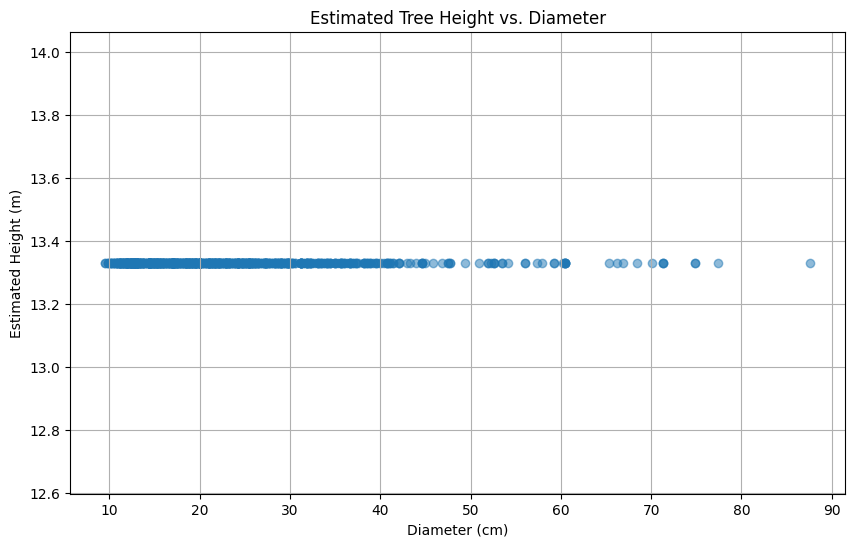

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the specified CSV file path with the correct delimiter
file_path = '/kaggle/input/kbnatparc-biomass-estimation/Biomass-Estimat-KBNP.csv'
data = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip')

# Inspect the first few rows and column names to confirm proper loading
print(data.head())
print(data.columns)

# Rename columns if necessary (based on inspection)
data.columns = ['METHODES', 'Genre', 'EPITHETE', 'CIRCONFERENCE_EN_CM', 'DIAMETRE_EN_CM', 'Altitude_en_m', 'Groupe', 'Espece', 'Volume_en_m3', 'BasalArea', 'WoodDensity', 'Superficie_ha']

# Replace commas with periods in the 'DIAMETRE_EN_CM' column and convert to float
data['DIAMETRE_EN_CM'] = data['DIAMETRE_EN_CM'].astype(str).str.replace(',', '.').astype(float)

# Extract diameters from the DataFrame
diameters = data['DIAMETRE_EN_CM'].tolist()
altitude = 2350  # Example altitude

# Parameters for the Upper Montane (2400–2600 m) Model 3
a = 13.33
b = 11.11
c = 1.35

# Function to estimate height from diameter using the selected model
def estimate_height(diameter, a, b, c):
    return a * (1 - np.exp(-b * diameter)) ** c

# Estimate heights for all diameters
heights = [estimate_height(d, a, b, c) for d in diameters]

# Add estimated heights to the DataFrame
data['Estimated_Height'] = heights
data['Altitude'] = altitude

# Display the first few rows of the updated DataFrame
print(data.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(diameters, heights, alpha=0.5)
plt.xlabel('Diameter (cm)')
plt.ylabel('Estimated Height (m)')
plt.title('Estimated Tree Height vs. Diameter')
plt.grid(True)
plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
file_path = '/kaggle/input/kbnatparc-biomass-estimation/Biomass-Estimat-KBNP.csv'
data = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip')

# Rename columns for consistency
data.columns = ['METHODES', 'Genre', 'EPITHETE', 'CIRCONFERENCE_EN_CM', 'DIAMETRE_EN_CM', 'Altitude_en_m', 'Groupe', 'Espece', 'Volume_en_m3', 'BasalArea', 'WoodDensity', 'Superficie_ha']

# Replace commas with periods and convert to float
data['DIAMETRE_EN_CM'] = data['DIAMETRE_EN_CM'].astype(str).str.replace(',', '.').astype(float)
data['WoodDensity'] = data['WoodDensity'].astype(str).str.replace(',', '.').astype(float)
data['Volume_en_m3'] = data['Volume_en_m3'].astype(str).str.replace(',', '.').astype(float)

# Extract relevant columns for modeling
data_model = data[['DIAMETRE_EN_CM', 'Altitude_en_m', 'WoodDensity', 'Volume_en_m3']]

# Remove rows with missing values
data_model = data_model.dropna()


In [16]:
# Define features and target variable
X = data_model[['DIAMETRE_EN_CM', 'Altitude_en_m', 'WoodDensity']]
y = data_model['Volume_en_m3']  # Assuming 'Volume_en_m3' is your target variable for biomass

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 141471.28737389215
R^2 Score: 0.869053380303981


In [19]:
# Predict biomass for the entire dataset
data_model['Predicted_Biomass'] = model.predict(X)

# Display results
print(data_model.head())


   DIAMETRE_EN_CM  Altitude_en_m  WoodDensity  Volume_en_m3  Predicted_Biomass
0       10.828025           2350         0.49         57.44        -289.261464
1        9.872611           2350         0.49         43.30        -369.297469
2       12.420382           2350         0.49         86.68        -155.868123
3       12.420382           2350         0.49         86.68        -155.868123
4       11.464968           2350         0.49         68.26        -235.904128


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define polynomial features
poly = PolynomialFeatures(degree=2)
model_poly = make_pipeline(poly, LinearRegression())

# Fit the model
model_poly.fit(X_train, y_train)

# Make predictions
y_pred_poly = model_poly.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Mean Squared Error: {mse_poly}")
print(f"Polynomial R^2 Score: {r2_poly}")


Polynomial Mean Squared Error: 27166.507586273332
Polynomial R^2 Score: 0.9748545277037944


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R^2 Score: {r2}")


Linear Regression Mean Squared Error: 141471.28737389215
Linear Regression R^2 Score: 0.869053380303981


In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define polynomial features
poly = PolynomialFeatures(degree=2)
model_poly = make_pipeline(poly, LinearRegression())

# Fit the model
model_poly.fit(X_train, y_train)

# Make predictions
y_pred_poly = model_poly.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Mean Squared Error: {mse_poly}")
print(f"Polynomial R^2 Score: {r2_poly}")


Polynomial Mean Squared Error: 27166.507586273332
Polynomial R^2 Score: 0.9748545277037944


In [24]:
# Predict biomass using the polynomial model
data_model['Predicted_Biomass'] = model_poly.predict(X)

# Display results
print(data_model.head())


   DIAMETRE_EN_CM  Altitude_en_m  WoodDensity  Volume_en_m3  Predicted_Biomass
0       10.828025           2350         0.49         57.44         -25.469026
1        9.872611           2350         0.49         43.30         -52.758696
2       12.420382           2350         0.49         86.68          26.480488
3       12.420382           2350         0.49         86.68          26.480488
4       11.464968           2350         0.49         68.26          -5.659230


In [25]:
import numpy as np

# Clip negative predicted biomass values to zero
data_model['Predicted_Biomass'] = np.clip(model_poly.predict(X), 0, None)

# Display results
print(data_model.head())


   DIAMETRE_EN_CM  Altitude_en_m  WoodDensity  Volume_en_m3  Predicted_Biomass
0       10.828025           2350         0.49         57.44           0.000000
1        9.872611           2350         0.49         43.30           0.000000
2       12.420382           2350         0.49         86.68          26.480488
3       12.420382           2350         0.49         86.68          26.480488
4       11.464968           2350         0.49         68.26           0.000000


In [29]:
import joblib

# Save the model
joblib.dump(model_poly, 'biomass_model.pkl')

# Load the model
model_poly = joblib.load('biomass_model.pkl')


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred_poly_test = np.clip(model_poly.predict(X_test), 0, None)

# Recalculate MSE and R² Score for the clipped predictions on test set
mse_clipped = mean_squared_error(y_test, y_pred_poly_test)
r2_clipped = r2_score(y_test, y_pred_poly_test)

print(f"Clipped Predictions Mean Squared Error: {mse_clipped}")
print(f"Clipped Predictions R^2 Score: {r2_clipped}")


Clipped Predictions Mean Squared Error: 27107.74287700736
Clipped Predictions R^2 Score: 0.9749089206493782


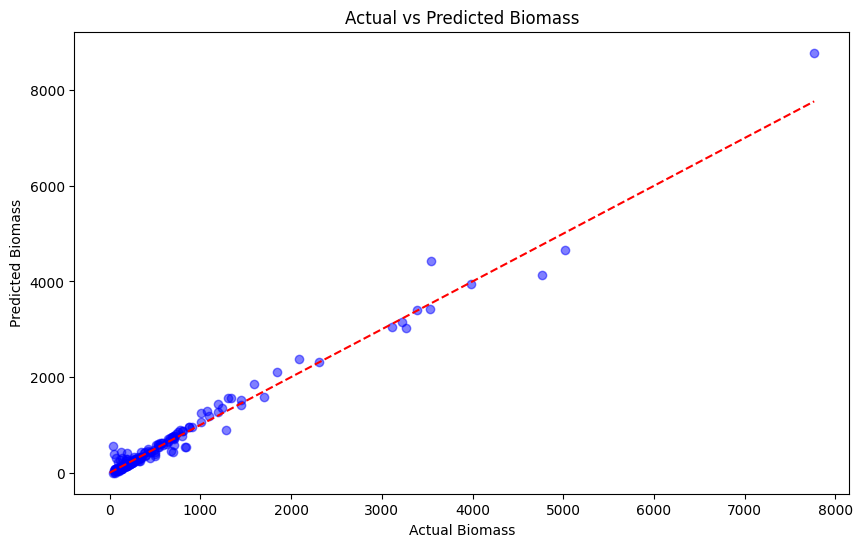

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly_test, color='blue', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.xlabel('Actual Biomass')
plt.ylabel('Predicted Biomass')
plt.title('Actual vs Predicted Biomass')
plt.show()


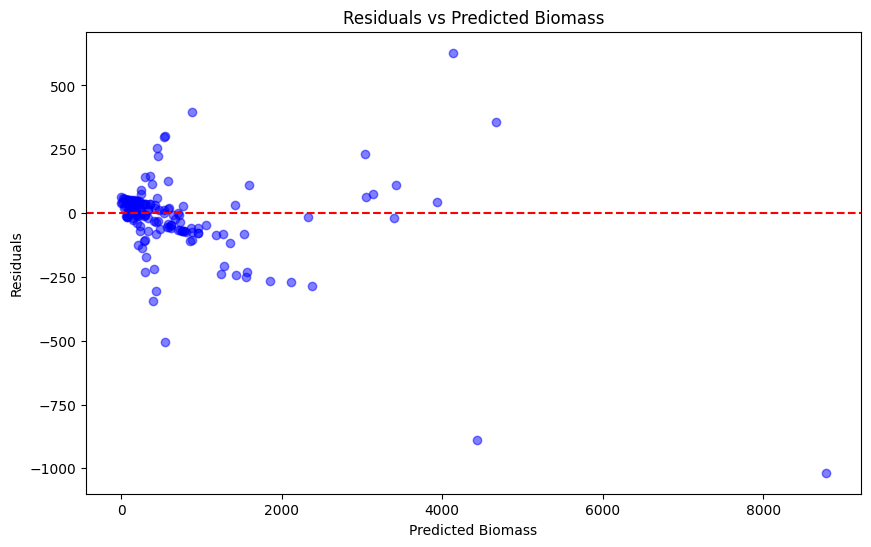

In [32]:
residuals = y_test - y_pred_poly_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_poly_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero error line
plt.xlabel('Predicted Biomass')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Biomass')
plt.show()


In [40]:
print("Actual Biomass Values (y_test):")
print(y_test.head())

print("Predicted Biomass Values:")
print(y_pred_poly_test[:5])


Actual Biomass Values (y_test):
247     56.06
670    336.12
227     61.04
290    455.19
538    639.34
Name: Volume_en_m3, dtype: float64
Predicted Biomass Values:
[ 71.397207   244.11931789  73.2311387  425.28075667 645.36850216]


In [41]:
# Define the carbon fraction (typically 0.5 for general estimates)
carbon_fraction = 0.5

# Estimate carbon stock
data_model['Estimated_Carbon_Stock'] = data_model['Predicted_Biomass'] * carbon_fraction

# Display results
print(data_model.head())


   DIAMETRE_EN_CM  Altitude_en_m  WoodDensity  Volume_en_m3  \
0       10.828025           2350         0.49         57.44   
1        9.872611           2350         0.49         43.30   
2       12.420382           2350         0.49         86.68   
3       12.420382           2350         0.49         86.68   
4       11.464968           2350         0.49         68.26   

   Predicted_Biomass  Estimated_Carbon_Stock  
0           0.000000                0.000000  
1           0.000000                0.000000  
2          26.480488               13.240244  
3          26.480488               13.240244  
4           0.000000                0.000000  


In [44]:
# Example of scenario analysis by varying a parameter (e.g., wood density)
wood_density_scenarios = [0.45, 0.50, 0.55]
for density in wood_density_scenarios:
    data_model['Predicted_Biomass_Scenario'] = model_poly.predict(X.assign(WoodDensity=density))
    data_model['Estimated_Carbon_Stock_Scenario'] = data_model['Predicted_Biomass_Scenario'] * carbon_fraction
    print(f"\nScenario with Wood Density {density}:")
    print(data_model[['Predicted_Biomass_Scenario', 'Estimated_Carbon_Stock_Scenario']].head())



Scenario with Wood Density 0.45:
   Predicted_Biomass_Scenario  Estimated_Carbon_Stock_Scenario
0                  -22.247385                       -11.123693
1                  -50.480374                       -25.240187
2                   31.274325                        15.637163
3                   31.274325                        15.637163
4                   -1.808711                        -0.904355

Scenario with Wood Density 0.5:
   Predicted_Biomass_Scenario  Estimated_Carbon_Stock_Scenario
0                  -25.912185                       -12.956092
1                  -52.966026                       -26.483013
2                   25.644280                        12.822140
3                   25.644280                        12.822140
4                   -6.259609                        -3.129804

Scenario with Wood Density 0.55:
   Predicted_Biomass_Scenario  Estimated_Carbon_Stock_Scenario
0                  -25.954472                       -12.977236
1                

    Predicted_Biomass_Scenario  Estimated_Carbon_Stock_Scenario  Wood_Density
0                   -22.247385                       -11.123693          0.45
1                   -50.480374                       -25.240187          0.45
2                    31.274325                        15.637163          0.45
3                    31.274325                        15.637163          0.45
4                    -1.808711                        -0.904355          0.45
5                   -25.912185                       -12.956092          0.50
6                   -52.966026                       -26.483013          0.50
7                    25.644280                        12.822140          0.50
8                    25.644280                        12.822140          0.50
9                    -6.259609                        -3.129804          0.50
10                  -25.954472                       -12.977236          0.55
11                  -51.829165                       -25.914583 

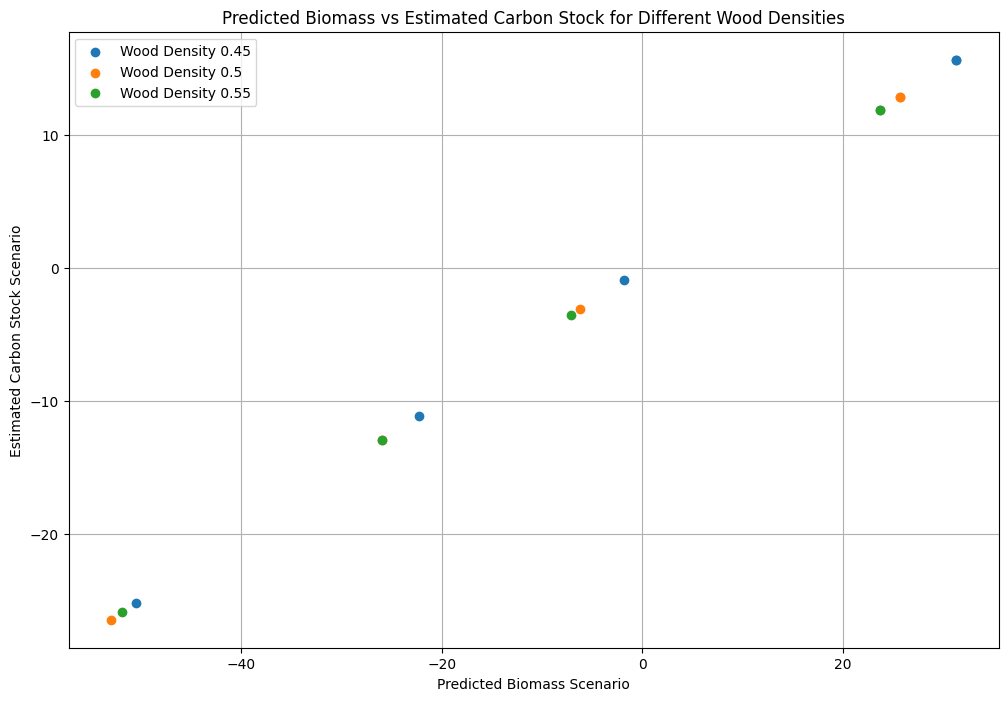

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrames for each scenario
df_density_045 = pd.DataFrame({
    'Predicted_Biomass_Scenario': [-22.247385, -50.480374, 31.274325, 31.274325, -1.808711],
    'Estimated_Carbon_Stock_Scenario': [-11.123693, -25.240187, 15.637163, 15.637163, -0.904355]
}, index=[0, 1, 2, 3, 4])

df_density_05 = pd.DataFrame({
    'Predicted_Biomass_Scenario': [-25.912185, -52.966026, 25.644280, 25.644280, -6.259609],
    'Estimated_Carbon_Stock_Scenario': [-12.956092, -26.483013, 12.822140, 12.822140, -3.129804]
}, index=[0, 1, 2, 3, 4])

df_density_055 = pd.DataFrame({
    'Predicted_Biomass_Scenario': [-25.954472, -51.829165, 23.636746, 23.636746, -7.087995],
    'Estimated_Carbon_Stock_Scenario': [-12.977236, -25.914583, 11.818373, 11.818373, -3.543997]
}, index=[0, 1, 2, 3, 4])

# Add a column to indicate wood density scenario
df_density_045['Wood_Density'] = 0.45
df_density_05['Wood_Density'] = 0.5
df_density_055['Wood_Density'] = 0.55

# Combine all scenarios into one DataFrame
data_combined = pd.concat([df_density_045, df_density_05, df_density_055], ignore_index=True)

# Display the combined data
print(data_combined)

# Summary statistics by wood density scenario
summary_stats = data_combined.groupby('Wood_Density').agg({
    'Predicted_Biomass_Scenario': ['mean', 'std'],
    'Estimated_Carbon_Stock_Scenario': ['mean', 'std']
})

print("Summary Statistics by Wood Density Scenario:")
print(summary_stats)

# Plot Predicted Biomass vs Estimated Carbon Stock for each wood density scenario
plt.figure(figsize=(12, 8))

for density in data_combined['Wood_Density'].unique():
    subset = data_combined[data_combined['Wood_Density'] == density]
    plt.scatter(subset['Predicted_Biomass_Scenario'], subset['Estimated_Carbon_Stock_Scenario'], label=f'Wood Density {density}')

plt.xlabel('Predicted Biomass Scenario')
plt.ylabel('Estimated Carbon Stock Scenario')
plt.title('Predicted Biomass vs Estimated Carbon Stock for Different Wood Densities')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming data_combined is your DataFrame and 'Estimated_Carbon_Stock_Scenario' is the target variable
X = data_combined[['Predicted_Biomass_Scenario', 'Wood_Density']]
y = data_combined['Estimated_Carbon_Stock_Scenario']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.2835210170620448


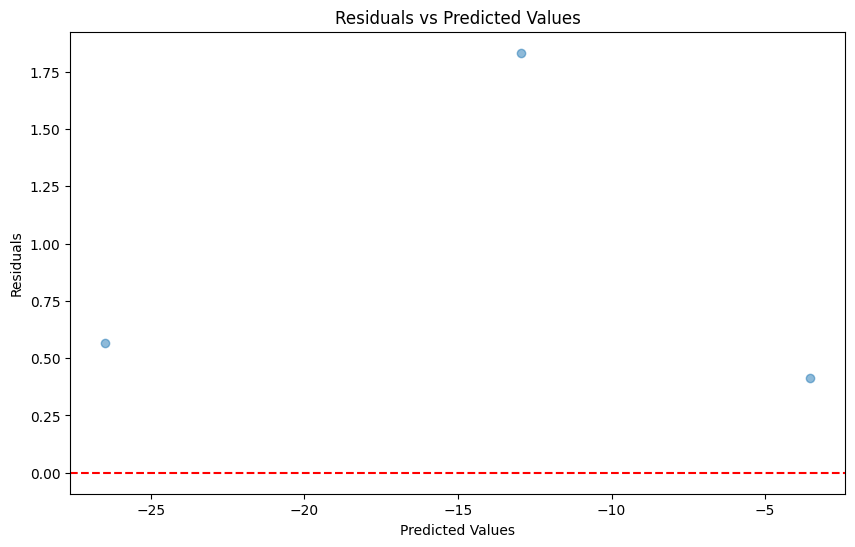

In [54]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


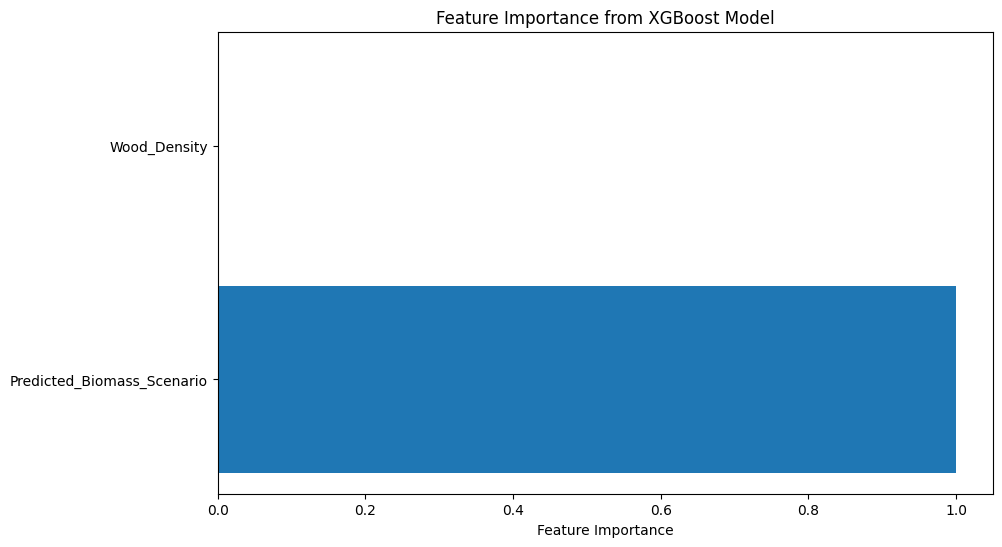

In [55]:
importances = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from XGBoost Model')
plt.show()
